In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import os
import sys
sys.path.insert(1, '../')
sys.path.insert(1, '../attgcn_preprocessor')
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from attgcn_api import ATTGCN_API
import numpy as np
import matplotlib.pyplot as plt
from py_utils.TSP_loader import TSP_loader
from py_utils.TSP_utils import TSP_plotter
from py_utils.TSP_transformer import TSP_EucTransformer
import torch
from tqdm import tqdm

In [3]:
NUM_NODES = 20
n_graphs = 1000
path = f'../data/test_sets'
# folder = f'synthetic_nrange_{NUM_NODES}_{NUM_NODES}_{n_graphs}'
folder = f'synthetic_n_{NUM_NODES}_{n_graphs}'

In [4]:
tsp_loader = TSP_loader()
g_list = tsp_loader.load_multi_tsp_as_nx(data_dir=f'{path}/{folder}', scale_factor=0.000001, start_index=0)

100%|██████████| 1000/1000 [00:06<00:00, 166.24it/s]


In [5]:
def load_tsp_solution(sol_filepath):
    solutions = []
    for line in open(sol_filepath):
        solution = line.split(':')[-1].strip(' ').strip('\n').strip('[]')
        solution.replace(' ', '')
        solution = [int(node) for node in solution.split(',')]
        solutions.append(solution)
    return solutions

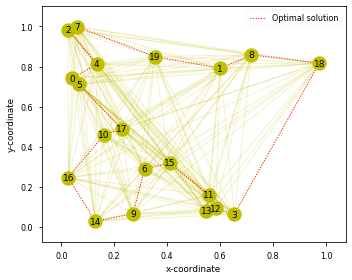

In [6]:
index = 0
graph = g_list[index]
all_solutions = load_tsp_solution(sol_filepath=f'{path}/{folder}/solutions.txt')
solution = all_solutions[index]
tsp_plotter = TSP_plotter()
tsp_plotter.plot_nx_graph(graph, solution=solution, edge_probs=None, save_path=None)

In [ ]:
def rate_heatmap(heatmap, solution):
    probable_edge_ratio, num_probable_edges, tour_edge_score, probable_edge_score = get_heatmap_statistics(heatmap, solution)
    if probable_edge_ratio < 1:
        rating = 0
    else:
        bad_edge_score = probable_edge_score - tour_edge_score
        num_nodes = heatmap.shape[0]
        rating = tour_edge_score / (bad_edge_score + num_nodes*0.5)
        # rating = tour_edge_score / probable_edge_score
    return rating, num_probable_edges

In [7]:
transformer = TSP_EucTransformer()

In [8]:
problems = [transformer.load_TSP_from_nx(g) for g in g_list]

In [9]:
transformer.pomo_TSP(problems[0], variant=2)

array([[0.040435, 0.258245],
       [0.600898, 0.208644],
       [0.026282, 0.015141],
       [0.653799, 0.936084],
       [0.134266, 0.18804 ],
       [0.065621, 0.288305],
       [0.314466, 0.711562],
       [0.059258, 0.001672],
       [0.717287, 0.14069 ],
       [0.270784, 0.933363],
       [0.160576, 0.540117],
       [0.55827 , 0.840954],
       [0.583664, 0.90675 ],
       [0.548571, 0.920632],
       [0.128376, 0.971287],
       [0.409345, 0.680323],
       [0.026314, 0.753378],
       [0.228263, 0.51061 ],
       [0.974726, 0.183288],
       [0.352249, 0.149902]])

In [41]:
problems[0]

array([[0.040435, 0.741755],
       [0.600898, 0.791356],
       [0.026282, 0.984859],
       [0.653799, 0.063916],
       [0.134266, 0.81196 ],
       [0.065621, 0.711695],
       [0.314466, 0.288438],
       [0.059258, 0.998328],
       [0.717287, 0.85931 ],
       [0.270784, 0.066637],
       [0.160576, 0.459883],
       [0.55827 , 0.159046],
       [0.583664, 0.09325 ],
       [0.548571, 0.079368],
       [0.128376, 0.028713],
       [0.409345, 0.319677],
       [0.026314, 0.246622],
       [0.228263, 0.48939 ],
       [0.974726, 0.816712],
       [0.352249, 0.850098]])

In [80]:
np.expand_dims(problems[0:100],axis=1).shape

(100, 1, 20, 2)

In [101]:
sample_steps = 2
problems_transformed = [[transformer.apply_random_transfo(problem) for step in range(sample_steps-1)] for problem in tqdm(problems)]
# problems_transformed = np.append(np.expand_dims(problems,axis=1), problems_transformed, axis=1)
# problems_transformed = np.reshape(problems_transformed, (-1, problems_transformed.shape[-2], problems_transformed.shape[-1]))
problems_transformed = [problem for subl in problems_transformed for problem in subl]
np.array(problems_transformed).shape

100%|██████████| 1000/1000 [00:00<00:00, 2728.49it/s]


(1000, 20, 2)

In [91]:
g_list_new = [transformer.save_TSP_as_nx(problem) for problem in problems_transformed]

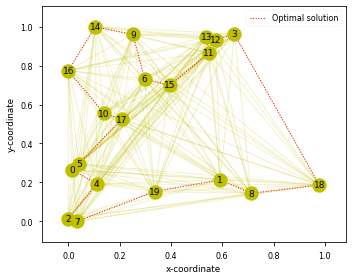

In [47]:
index = 0
graph = g_list_new[index][63]
all_solutions = load_tsp_solution(sol_filepath=f'{path}/{folder}/solutions.txt')
solution = all_solutions[index]
tsp_plotter = TSP_plotter()
tsp_plotter.plot_nx_graph(graph, solution=solution, edge_probs=None, save_path=None)